<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/01_artificial_intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [ ]:
y

array([1, 1, 2, 3, 2, 2, 1, 3, 2, 3, 3, 1, 3, 0, 0, 1, 3, 0, 3, 0, 0, 1,
       2, 3, 2, 2, 0, 0, 2, 1, 3, 2, 2, 0, 2, 1, 2, 1, 3, 3, 3, 2, 0, 0,
       1, 2, 3, 0, 3, 0, 1, 0, 2, 0, 2, 1, 2, 3, 0, 1, 2, 0, 1, 3, 1, 0,
       2, 2, 2, 3, 1, 2, 3, 0, 3, 1, 3, 0, 3, 3, 2, 1, 2, 1, 3, 3, 1, 3,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0])

In [ ]:
model = KMeans(n_clusters=4, random_state=0)

In [ ]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [ ]:
y_ = model.predict(x)

In [ ]:
y_

array([0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 0,
       2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 3,
       0, 2, 1, 3, 1, 3, 0, 3, 2, 3, 2, 0, 2, 1, 3, 0, 2, 3, 0, 1, 0, 3,
       2, 2, 2, 1, 0, 2, 1, 3, 1, 0, 1, 3, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3], dtype=int32)

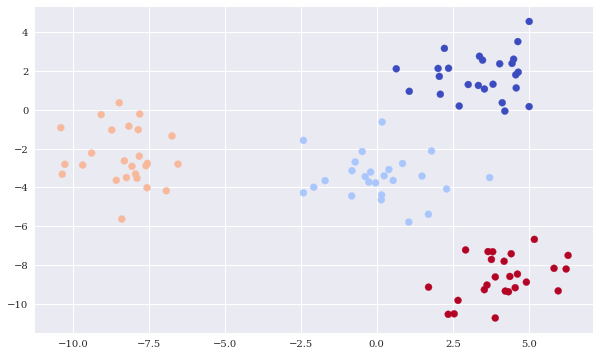

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforement Learning

In [ ]:
ssp = [1, 1, 1, 1, 0]

In [ ]:
asp = [1, 0]

In [ ]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [ ]:
rl = np.array([epoch() for _ in range(15)])
rl

array([51, 52, 50, 54, 53, 44, 52, 46, 51, 42, 57, 50, 51, 48, 55])

In [ ]:
rl.mean()

50.4

In [ ]:
ssp = [1, 1, 1, 1, 0]

In [ ]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [ ]:
rl = np.array([epoch() for _ in range(15)])
rl

array([72, 73, 71, 69, 75, 67, 58, 58, 66, 69, 60, 69, 64, 73, 60])

In [ ]:
rl.mean()

66.93333333333334

## Supervised Learning

In [ ]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [ ]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [ ]:
y=f(x)

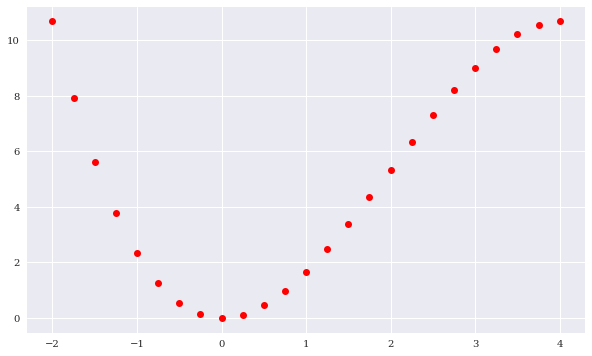

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(x, y, 'ro');

In [ ]:
beta = np.cov(x, y, ddof=0)[0,1] / np.var(x)
beta

1.0541666666666667

In [ ]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [ ]:
y_ = alpha + beta * x

In [ ]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

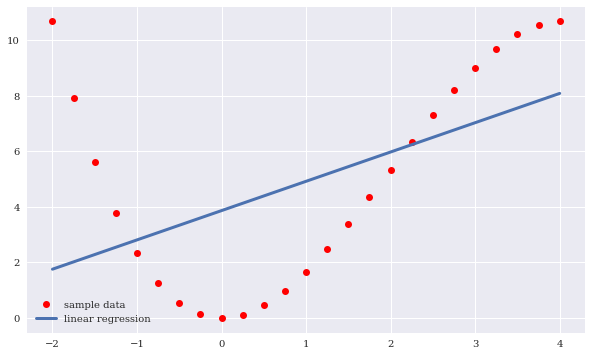

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(x, y, 'ro', label = 'sample data')
plt.plot(x, y_, lw=3.0, label = 'linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


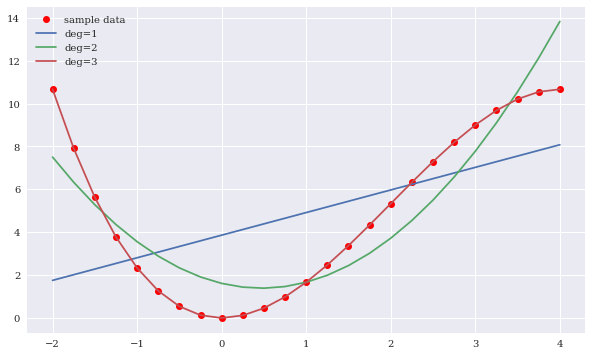

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


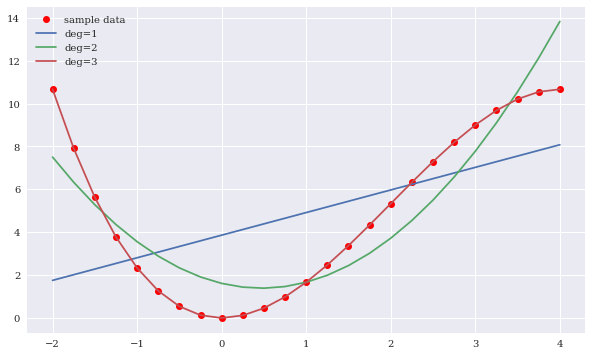

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

## Neural Network &mdash; `sklearn`

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000, random_state=1000)

In [ ]:
%time model.fit(x.reshape(-1, 1), y)

CPU times: user 1.46 s, sys: 844 ms, total: 2.3 s
Wall time: 1.26 s


MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000, random_state=1000)

In [ ]:
y_ = model.predict(x.reshape(-1, 1))

In [ ]:
MSE = ((y - y_) ** 2).mean()
MSE

0.006775846547442415

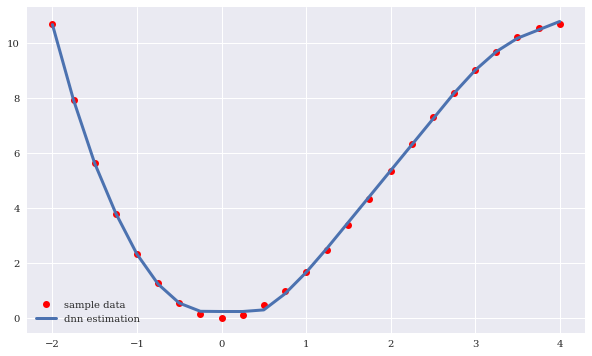

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

### Neural Network &mdash; `Keras`

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 1))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               512       
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
((y - y_) ** 2).mean()

0.006775846547442415

round=1 | MSE=3.87256
round=2 | MSE=0.92527
round=3 | MSE=0.28527
round=4 | MSE=0.13193
round=5 | MSE=0.09568


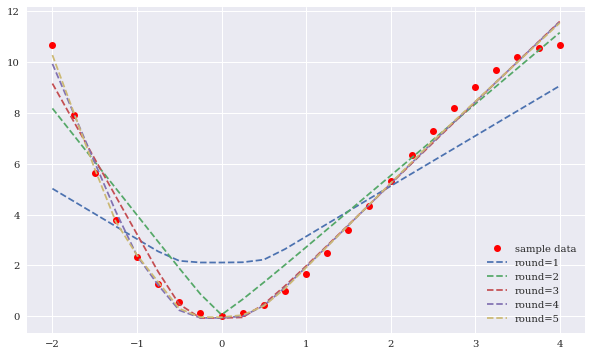

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Universal Approximation

In [ ]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

In [ ]:
len(x)

50

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


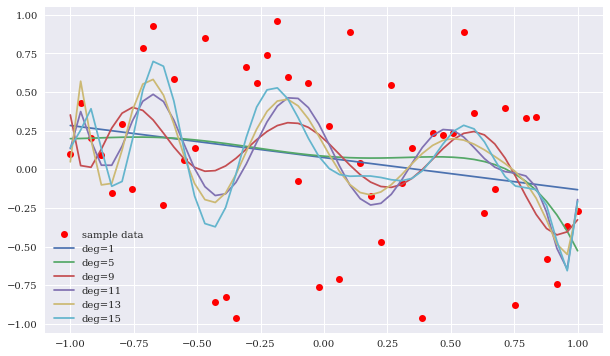

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               512       
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


round=1 | MSE=0.13720
round=2 | MSE=0.08264
round=3 | MSE=0.06643
round=4 | MSE=0.04982
round=5 | MSE=0.04432
round=6 | MSE=0.03207
round=7 | MSE=0.01439
CPU times: user 46.3 s, sys: 2.8 s, total: 49.1 s
Wall time: 33.2 s


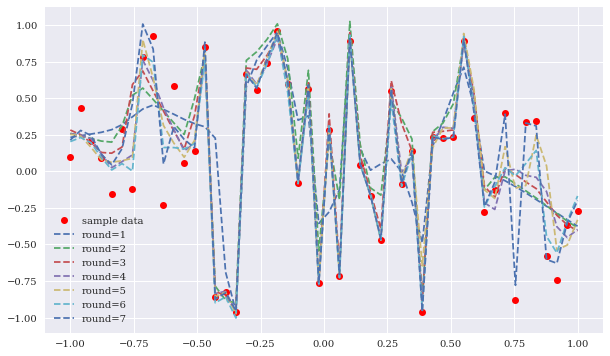

In [ ]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ =  model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Classification with Neutral Network

In [ ]:
f = 5
n = 10

In [ ]:
np.random.seed(100)

In [ ]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [ ]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               1536      
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(x, y, epochs=50, verbose=False)

In [ ]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
y == y_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
res = pd.DataFrame(h.history)

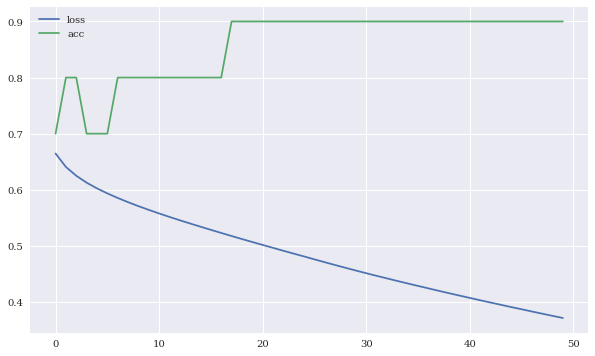

In [ ]:
res.plot(figsize=(10, 6));

In [ ]:
f = 10
n = 250

In [ ]:
np.random.seed(100)

In [ ]:
x = np.random.randint(0, 2, (n, f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [ ]:
y = np.random.randint(0, 2, n)
y[:4]

array([0, 1, 0, 0])

In [ ]:
2 ** f

1024

In [ ]:
fcols = [f'f{_}' for _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [ ]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y

In [ ]:
data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,l
0,0,0,1,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,1,1
2,0,1,0,0,0,1,1,1,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0
4,1,1,1,1,1,1,1,1,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int64
 1   f1      250 non-null    int64
 2   f2      250 non-null    int64
 3   f3      250 non-null    int64
 4   f4      250 non-null    int64
 5   f5      250 non-null    int64
 6   f6      250 non-null    int64
 7   f7      250 non-null    int64
 8   f8      250 non-null    int64
 9   f9      250 non-null    int64
 10  l       250 non-null    int64
dtypes: int64(11)
memory usage: 21.6 KB


In [ ]:
grouped = data.groupby(list(data.columns))

In [ ]:
data.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'l'], dtype='object')

In [ ]:
list(grouped)[0]

((0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1),
      f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  l
 126   0   0   0   0   0   0   0   1   1   1  1)

In [ ]:
data.loc[[126]]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,l
126,0,0,0,0,0,0,0,1,1,1,1


In [ ]:
grouped['l'].size()

f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  l
0   0   0   0   0   0   0   1   1   1   1    1
                        1   0   1   0   0    1
                                        1    1
                                    1   1    1
                    1   0   0   0   0   0    1
                                            ..
1   1   1   1   1   0   0   0   0   0   1    1
                            1   0   0   0    1
                        1   1   0   0   1    1
                    1   1   0   0   0   0    1
                            1   0   1   1    2
Name: l, Length: 239, dtype: int64

In [ ]:
freq = grouped['l'].size().unstack(fill_value=0)
freq

l                              0  1
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9      
0  0  0  0  0  0  0  1  1  1   0  1
                  1  0  1  0   1  1
                           1   0  1
               1  0  0  0  0   1  0
                           1   0  1
...                           .. ..
1  1  1  1  1  0  0  0  0  0   0  1
                     1  0  0   1  0
                  1  1  0  0   0  1
               1  1  0  0  0   1  0
                     1  0  1   0  2

[227 rows x 2 columns]

In [ ]:
freq['sum'] = freq[0] + freq[1]

In [ ]:
freq

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
...                           .. ..  ...
1  1  1  1  1  0  0  0  0  0   0  1    1
                     1  0  0   1  0    1
                  1  1  0  0   0  1    1
               1  1  0  0  0   1  0    1
                     1  0  1   0  2    2

[227 rows x 3 columns]

In [ ]:
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [ ]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[128, 128, 128],
                      max_iter=1000, random_state=100)

In [ ]:
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [ ]:
data['l']

0      0
1      1
2      0
3      0
4      1
      ..
245    0
246    1
247    1
248    0
249    0
Name: l, Length: 250, dtype: int64

In [ ]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [ ]:
split = int(len(data) * 0.7)

In [ ]:
train = data[:split]
test = data[split:]

In [ ]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [ ]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [ ]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.38666666666666666

In [ ]:
factor = 50

In [ ]:
big = pd.DataFrame(np.random.randint(0, 2, (factor * n, f)),
                   columns=fcols)

In [ ]:
big['l'] = np.random.randint(0, 2, factor * n)

In [ ]:
train = big[:split]
test = big[split:]

In [ ]:
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [ ]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [ ]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751

In [ ]:
grouped = big.groupby(list(data.columns))

In [ ]:
freq = grouped['l'].size().unstack(fill_value=0)

In [ ]:
freq['sum'] = freq[0] + freq[1]

In [ ]:
freq.head(6)

l                               0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9            
0  0  0  0  0  0  0  0  0  0   10  9   19
                           1    5  4    9
                        1  0    2  5    7
                           1    6  6   12
                     1  0  0    9  8   17
                           1    7  4   11

In [ ]:
freq['sum'].describe().astype(int)

count    1024
mean       12
std         3
min         2
25%        10
50%        12
75%        15
max        26
Name: sum, dtype: int64

In [ ]:
8 ** 25

37778931862957161709568